In [1]:
import pandas as pd
from collections import Counter
import numpy as np
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm

In [2]:
def most_tags(dataframes, nbr_tags: int = 50):
    dataframe = dataframes.copy()
    # vectorizer = CountVectorizer(preprocessor=lambda x: x, tokenizer=lambda x: str(x).split(" "), token_pattern=None)
    # tag_vect = vectorizer.fit_transform(dataframe["Tags"])
    # tags = vectorizer.get_feature_names_out()
    # freqs = tag_vect.sum(axis=0).A1
    # result = list(zip(tags, freqs))
    # tag_counts = pd.DataFrame(result, columns=['tag', 'tag_counts']).sort_values(['tag_counts'], ascending=False)
    cnt = Counter()
    for text in dataframe["Tags"].values:
        cnt[text] += 1
        for word in text.split(): #
            cnt[word] += 1
    tag_counts = pd.DataFrame(cnt.most_common(), columns=["Word", "Freq"]).sort_values(['Freq'], ascending=False)

    tags_kept = list(tag_counts['Word'].head(nbr_tags))

    # print(f"Top ten tags  : {tags_kept[:10]}")
    print(f"Number of tags kept : {len(tags_kept)}")

    for le in tqdm(range(dataframe.shape[0])):
        a = []
        b = dataframe['Tags'][le].split(" ")

        for i in range(len(b)):
            for j in tags_kept:
                temp = b[i].strip()  #Stripping the white-spaces present(if any) around the tag
                if temp == j:
                    a.append(j)
        if a:
            dataframe.loc[le, 'Tags'] = " ".join(a)
        else:
            dataframe.loc[le, 'Tags'] = np.nan
    dataframe = dataframe.dropna()
    print(dataframe.shape)
    return dataframe

def remove_html_tags(col):
    return BeautifulSoup(col, "lxml").text

def text_to_lower(text):
    return text.lower()

In [3]:
df = pd.read_csv('../other_dataset/QueryResults(2).csv')
df.rename(columns={'Unnamed: 0' : 'Title'}, inplace=True)
df.rename(columns={'Unnamed: 1' : 'Body'}, inplace=True)
df["Tags"] = df["Tags"].str.lstrip('<').str.replace('<', ' ').str.replace('>', '')
# df['Body'] = df['Body'].apply(lambda x :remove_html_tags(x))
# df['Body'] = df['Body'].apply(lambda x :text_to_lower(x))
df.head(10)

Title  \
0  how to find the cause of a malloc "double free...   
1          how can i protect myself from a zip bomb?   
2  alternative "architectural" approaches to java...   
3             mocking asp.net-mvc controller context   
4                          change templates in xcode   
5     toolkit options for 2d python game programming   
6            how do i list the symbols in a .so file   
7  what are the main performance differences betw...   
8                           spread vs mpi vs zeromq?   
9           what are high-pass and low-pass filters?   

                                                Body       Id  \
0  <p>i'm programming an application in objective...   971249   
1  <p>i just read about <a href="http://en.wikipe...  1459080   
2  <p>how is your javascript code organized? does...    32540   
3  <p>so the controller context depends on some a...    32640   
4  <p>how would i change the initial templates cr...    33720   
5  <p>what are some toolkits for developing 2d ga...    34611   
6  <p>how do i list the symbols being exported fr...    34732   
7  <p>i'm working on a database for a small web a...    35366   
8  <p>in one of the answers to <a href="https://s...    35490   
9  <p>graphics and audio editing and processing s...    35530   

                                                Tags  Score  ViewCount  \
0  iphone objective-c memory-management malloc au...     82      79057   
1               java python security compression zip     57      26135   
2  javascript model-view-controller architecture ...     19       1372   
3   asp.net-mvc unit-testing mocking moq rhino-mocks     70      48431   
4              xcode macos templates xcode4 xcode4.5    113      51763   
5       python-3.x pygame libraries toolkit 2d-games     13       6123   
6                    c++ c gcc symbols name-mangling    594     512500   
7  sql-server sql-server-2005 storage varchar nva...    247     182380   
8  api networking messaging distributed cluster-c...     47      14064   
9  algorithm graphics audio photoshop signal-proc...     27      85513   

   AnswerCount  FavoriteCount  
0           13            0.0  
1            7            0.0  
2            7            0.0  
3            7            0.0  
4           10            0.0  
5            7            0.0  
6           11            0.0  
7           14            0.0  
8            3            0.0  
9            6            0.0

In [4]:
df1 = pd.read_csv('../ref_dataset/new_tags.csv')
df1.rename(columns={'Unnamed: 0' : 'Title'}, inplace=True)
df1["Tags"] = df1["Tags"].str.lstrip('<').str.replace('<', ' ').str.replace('>', '')
# df1['Body'] = df1['Body'].apply(lambda x :text_to_lower(x))
df1.head(10)

Title  \
0  calling .net web service (wse 2/3, ws-security...   
1                    dynamic alphabetical navigation   
2  how to fix circle and rectangle overlap in col...   
3  how do you deal with transport-level errors in...   
4  how to deploy a java ee application in the ama...   
5  what is the equivalent of perl's (<>) in pytho...   
6      why declare a local function static in c# 8.0   
7  asp.net custom validator client side & server ...   
8                ruby equivalent for python's "try"?   
9               asp.net custom controls - composites   

                                                Body        Id  \
0  <p>I need to call a web service written in .NE...     16451   
1  <p>I'm using <code>ColdFusion</code> to return...     16458   
2  <p>Since in the digital world a real collision...  18704999   
3  <p>Every now and then in a high volume .NET ap...     16610   
4  <p>Here's the thing: I need to take a certain ...   4042477   
5  <p>In Perl one uses:</p>\n\n<pre><code>while (...   4554819   
6  <p>In C# 8.0, <a href="https://learn.microsoft...  58745614   
7  <p>This has not happened to me before, but for...    701029   
8  <p>I'm trying to convert some Python code into...  18705373   
9  <h2>Summary</h2>\n<p>Hi All,<br />\nOK, furthe...     17532   

                                                Tags  Score  ViewCount  \
0                    java .net axis2 ws-security wse     23      14052   
1              javascript jquery sql html coldfusion      9       3283   
2  java collision-detection physics collision gam...     10      12806   
3         c# sql-server tsql ado.net sql-server-2000     33      25173   
4     java jakarta-ee amazon-ec2 cloud cloud-hosting     22      19503   
5    python perl file-io file command-line-arguments      7        881   
6              c# .net static c#-8.0 local-functions     22       4658   
7         c# .net asp.net validation customvalidator     75     261598   
8  python python-3.x ruby try-catch language-comp...     72      47824   
9             c# .net asp.net user-controls controls     19       4164   

   AnswerCount  FavoriteCount  
0            5            0.0  
1            5            0.0  
2            3            0.0  
3           11            0.0  
4            3            0.0  
5            7            0.0  
6            4            0.0  
7            7            0.0  
8            3            0.0  
9            6            0.0

In [5]:
df2 = pd.read_csv('../QueryResults.csv')
df2["Tags"] = df2["Tags"].str.lstrip('<').str.replace('<', ' ').str.replace('>', '')
# df2['Body'] = df2['Body'].apply(lambda x :text_to_lower(x))
df2.head(10)

Title  \
0  Android Studio : "Could not get unknown proper...   
1  How to mock history.push with the new React Ro...   
2             C#: Converting List of Chars to String   
3  Implementing efficient audit trail of record c...   
4  How to change the number of rows in the textar...   
5                Firebase 401 unauthorized error FCM   
6                           Firebase is not defined?   
7            Gradle - get URL of dependency artifact   
8          Programmatically get the cache line size?   
9        Django's "dumpdata" or Postgres' "pg_dump"?   

                                                Body  \
0  <p>I am a newbie with Android Studio. I am try...   
1  <p>I am trying to mock <code>history.push</cod...   
2  <p>I'm solving a coding challenge on Coderbyte...   
3  <p>I have a quite common design problem: I nee...   
4  <p>I have a textarea with 5 lines. I want to s...   
5  <p>I'm trying to test out Firebase Cloud messa...   
6  <p>I'm working on an Angular project and use F...   
7  <p>I want to download the dependency artifacts...   
8  <p>All platforms welcome, please specify the p...   
9  <p>I'm unsure as to whether this question shou...   

                                                Tags        Id  Score  \
0  java android android-studio gradle android-gra...  40420705      6   
1  reactjs react-router jestjs react-router-dom r...  58524183     53   
2                                          c# string  58524222     14   
3  python performance google-app-engine audit exp...   4417130      6   
4           javascript jquery textarea jquery-events   4417161     21   
5                   android firebase-cloud-messaging  37633188     77   
6  javascript angularjs firebase firebase-realtim...  37633212      7   
7                                             gradle  37697622     17   
8  c++ c caching operating-system systems-program...    794632    195   
9  django database postgresql database-backups du...  38103438     14   

   ViewCount  FavoriteCount  AnswerCount  
0      51645            0.0            3  
1      60110            0.0            3  
2      30960            NaN            1  
3       2075            0.0            1  
4      32115            0.0            3  
5     115365            0.0           10  
6      26169            NaN            6  
7       5612            0.0            4  
8      95770            0.0            9  
9       6487            0.0            1

In [6]:
df3 = pd.read_csv('../tag_5/QueryResults (3).csv')
df3["Tags"] = df3["Tags"].str.lstrip('<').str.replace('<', ' ').str.replace('>', '')
# df3['Body'] = df3['Body'].apply(lambda x :text_to_lower(x))
df3.head(10)

Title  \
0      What is the right way to self-host a Web API?   
1  How to serialize using gson with @SerializedNa...   
2  Abstraction VS Information Hiding VS Encapsula...   
3  What's the best way to get to know linux or BS...   
4  Is there a performance difference between i++ ...   
5                         How to leverage npm audit?   
6  Is there a performance difference between i++ ...   
7                       Custom 404 with HttpListener   
8  Invoking few queries to different data sources...   
9  What is your experience with software model ch...   

                                                Body  \
0  <p>I'm not asking for a best practice advice s...   
1  <p>This is my first approach to serialization ...   
2  <p>Can you tell me what is the difference betw...   
3  <p>I'd like to gain better knowledge of operat...   
4  <p>Is there a performance difference between <...   
5  <p><strong>TLDR:</strong> Is it possible to le...   
6  <p>We have the question <a href="/q/24886">is ...   
7  <p>I'm having an issue with HttpListener, it's...   
8  <p>I've got an application with 3 distributed ...   
9  <ul>\n<li>What types of applications have you ...   

                                                Tags        Id  Score  \
0                c# android wcf asp.net-web-api owin  20563066     29   
1         java android annotations facebook-fql gson  20799324      7   
2  encapsulation abstraction glossary ooad inform...     24626    183   
3            linux operating-system kernel bsd osdev     24648     20   
4     c performance oop post-increment pre-increment     24886    525   
5    node.js npm reverse-engineering npmjs npm-audit  56710565      8   
6   c++ performance oop post-increment pre-increment     24901    407   
7                 c# .net http .net-4.5 httplistener  18847301      6   
8            java multithreading spring jta atomikos  18847256      8   
9  algorithm correctness formal-methods formal-ve...     25137      6   

   ViewCount  FavoriteCount  AnswerCount  
0       8008            0.0            1  
1      36523            0.0            2  
2     158979            0.0           22  
3       5738            0.0           12  
4     130335            0.0           14  
5      12270            0.0            1  
6     104659            0.0           20  
7       3519            0.0            1  
8       1211            0.0            1  
9       1855            0.0            5

In [7]:
df4 = pd.read_csv('../tag_5 (copie)/QueryResults (4).csv')
df4["Tags"] = df4["Tags"].str.lstrip('<').str.replace('<', ' ').str.replace('>', '')
# df4['Body'] = df4['Body'].apply(lambda x :text_to_lower(x))
df4.head(10)

Title  \
0      What is the right way to self-host a Web API?   
1  How to serialize using gson with @SerializedNa...   
2                       Custom 404 with HttpListener   
3  Invoking few queries to different data sources...   
4                       Java configuration framework   
5  Is there any way to automate windows forms tes...   
6                  pyGame within a pyGTK application   
7  wxpython: How do I examine dragged data in OnD...   
8  Compact Framework - Is there an MVC framework/...   
9      Getting all types that implement an interface   

                                                Body  \
0  <p>I'm not asking for a best practice advice s...   
1  <p>This is my first approach to serialization ...   
2  <p>I'm having an issue with HttpListener, it's...   
3  <p>I've got an application with 3 distributed ...   
4  <p>I'm in the process of weeding out all hardc...   
5  <p>I am familiar with nunit for unit testing o...   
6  <p>What is the best way to use PyGame (SDL) wi...   
7  <p>I'm a bit perplexed by drag and drop in wxP...   
8  <p>I've found <a href="http://blogs.msdn.com/p...   
9  <p>Using reflection, how can I get all types t...   

                                                Tags        Id  Score  \
0                c# android wcf asp.net-web-api owin  20563066     29   
1         java android annotations facebook-fql gson  20799324      7   
2                 c# .net http .net-4.5 httplistener  18847301      6   
3            java multithreading spring jta atomikos  18847256      8   
4  java xml configuration frameworks configuratio...     25765     76   
5            c# .net vb.net winforms automated-tests     25343     54   
6                        python gtk pygtk sdl pygame     25661      9   
7  python user-interface drag-and-drop wxpython w...     26706      6   
8  c# model-view-controller windows-mobile compac...     26355      9   
9           c# optimization reflection lambda c#-3.0     26733    649   

   ViewCount  FavoriteCount  AnswerCount  
0       8008            0.0            1  
1      36523            0.0            2  
2       3519            0.0            1  
3       1211            0.0            1  
4      30663            0.0           14  
5      38008            0.0            9  
6       4941            0.0            7  
7        595            0.0            2  
8       2727            0.0            7  
9     360055            0.0           19

In [8]:
df5 = pd.read_csv('../tag_5 (autre copie)/QueryResults (5).csv')
df5["Tags"] = df5["Tags"].str.lstrip('<').str.replace('<', ' ').str.replace('>', '')
# df5['Body'] = df5['Body'].apply(lambda x :text_to_lower(x))
df5.head(10)

Title  \
0   How to handle "outside" click on Dialog (Modal)?   
1  What does Connection.isValid(time) actually do...   
2  @ExceptionHandler doesn't handle the thrown ex...   
3  Jackson is ignoring spring.jackson.properties ...   
4  Does Entity Framework/LINQ to SQL Data Binding...   
5  Formatted output in OpenOffice/Microsoft Word ...   
6  Jackson , java.time , ISO 8601 , serialize wit...   
7  Spring Integration 5.1 - integration flow conv...   
8           Make a WPF ListBox comma separate values   
9  Is DateTime.Now the best way to measure a func...   

                                                Body  \
0  <p>My box closes when clicking outside of the ...   
1  <p>Using OJDBC process does the isValid method...   
2  <p>I have a method in my controller which will...   
3  <p>Jackson is ignoring spring.jackson.property...   
4  <p>Forgive me if this has been asked before; I...   
5  <p>I am working on a project (in Python) that ...   
6  <p>I'm using Jackson 2.8 and need to communica...   
7  <p>I upgrade my Spring boot version from <code...   
8  <p>I have a ListBox that looks like this:</p>\...   
9  <p>I need to find a bottleneck and need to acc...   

                                                Tags        Id  Score  \
0  javascript reactjs dialog modal-dialog materia...  57329278     60   
1                       java sql database jdbc ojdbc  37972004      9   
2               java spring jsp exception spring-mvc   2872120     10   
3         java spring spring-mvc spring-boot jackson  40649177     17   
4  c# vb.net linq-to-sql entity-framework reflection    766540      8   
5  python formatting ms-word ms-office openoffice...    920938      6   
6    java jackson java-time jackson-modules jackson2  40487656     18   
7  java spring-boot spring-integration upgrade sp...  57910790      7   
8                           c# .net wpf xaml listbox  19733671      6   
9                 c# .net performance datetime timer     28637    493   

   ViewCount  FavoriteCount  AnswerCount  
0      59763            0.0            9  
1       5374            0.0            2  
2       5535            0.0            2  
3      17741            0.0            7  
4       3506            0.0            3  
5       5458            0.0            7  
6      22080            0.0            3  
7        315            NaN            1  
8       3204            0.0            2  
9      73276            0.0           16

In [9]:
# df_merged = pd.concat([data, data1, data2], ignore_index=True, sort=False)
df_merged = pd.concat([df, df2, df1, df3, df4, df5], ignore_index=True, sort=False)
df_merged.head()

Title  \
0  how to find the cause of a malloc "double free...   
1          how can i protect myself from a zip bomb?   
2  alternative "architectural" approaches to java...   
3             mocking asp.net-mvc controller context   
4                          change templates in xcode   

                                                Body       Id  \
0  <p>i'm programming an application in objective...   971249   
1  <p>i just read about <a href="http://en.wikipe...  1459080   
2  <p>how is your javascript code organized? does...    32540   
3  <p>so the controller context depends on some a...    32640   
4  <p>how would i change the initial templates cr...    33720   

                                                Tags  Score  ViewCount  \
0  iphone objective-c memory-management malloc au...     82      79057   
1               java python security compression zip     57      26135   
2  javascript model-view-controller architecture ...     19       1372   
3   asp.net-mvc unit-testing mocking moq rhino-mocks     70      48431   
4              xcode macos templates xcode4 xcode4.5    113      51763   

   AnswerCount  FavoriteCount  
0           13            0.0  
1            7            0.0  
2            7            0.0  
3            7            0.0  
4           10            0.0

In [10]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295492 entries, 0 to 295491
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          295492 non-null  object 
 1   Body           295492 non-null  object 
 2   Id             295492 non-null  int64  
 3   Tags           295492 non-null  object 
 4   Score          295492 non-null  int64  
 5   ViewCount      295492 non-null  int64  
 6   AnswerCount    295492 non-null  int64  
 7   FavoriteCount  264823 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 18.0+ MB


In [11]:
df_merged.drop(
    df_merged.loc[ df_merged['Id'].duplicated(keep=False), : ].index,
    inplace=True)
df_merged.shape

(102951, 8)

In [12]:
df_merged.drop(df_merged[df_merged['Body'].str.len() > 5000].index, inplace=True)

In [13]:
df_merged.drop(df_merged[df_merged['Title'].str.len() > 160].index, inplace=True)

In [14]:
df_merged["Tags"].apply(lambda text: len(str(text).split(" "))).describe()

count    99679.000000
mean         4.034551
std          1.279391
min          1.000000
25%          3.000000
50%          5.000000
75%          5.000000
max          6.000000
Name: Tags, dtype: float64

In [15]:
df_merged["Tags"].str.split(" ")

35        [iphone, ios, objective-c, uiimageview, cgcont...
65        [spring, spring-mvc, circular-reference, thyme...
67        [eclipse, git, bitbucket, egit, atlassian-sour...
72        [oop, laravel, laravel-4, repository-pattern, ...
107          [objective-c, iphone, uitableview, ipad, ios7]
                                ...                        
295451      [javascript, reactjs, cors, fiddler, fetch-api]
295458    [javascript, haskell, functional-programming, ...
295469                 [python, rest, timeout, wsgi, uwsgi]
295473    [c#, jquery, asp.net-mvc, twitter-bootstrap, d...
295477         [python, numpy, anaconda, conda, python-3.6]
Name: Tags, Length: 99679, dtype: object

In [16]:
new_df =  df_merged[df_merged["Tags"].str.split(" ").str.len() <= 5]

In [17]:
new_df.reset_index(inplace=True, drop=True)

In [18]:
# new_df["Tags"].str.split(" ").value_counts()
new_df["Tags"].value_counts()

python                                              172
javascript                                          170
c#                                                  165
c++                                                 139
html css                                            133
                                                   ... 
sql sql-server recursion common-table-expression      1
java input stream eofexception                        1
pdf ocaml ghostscript printer-control-language        1
c# sql parameters firebird                            1
python numpy anaconda conda python-3.6                1
Name: Tags, Length: 88098, dtype: int64

In [19]:
new_df[new_df['Tags'].isin(new_df['Tags'].value_counts().loc[lambda x: x >= 2].reset_index()['index'].tolist())]

Title  \
11          laravel eloquent get results grouped by days   
109    how do i pass a swift object to javascript (wk...   
128                bash tool to get nth line from a file   
139                  adding a target to an xcode project   
265     find index of maximum element in x86 simd vector   
...                                                  ...   
99580  how to split a dataset into training and valid...   
99635  What is the correct way to use Entity Framewor...   
99645                     Batch-major vs time-major LSTM   
99656  Model help using Scikit-learn when using GridS...   
99672   Expand collapse list item using angular material   

                                                    Body        Id  \
11     <p>i currently have a table of <code>page_view...  20603075   
109    <p>i am working on passing data from swift to ...  32113933   
128    <p>is there a "canonical" way of doing that? i...   6022384   
139    <p>i have an iphone application which is curre...   7409127   
265    <p>i'm thinking of implementing 8-ary heapsort...  23590610   
...                                                  ...       ...   
99580  <p>I have a multi class classification problem...  29082001   
99635  <p>I tried setting DataSource via DataGridView...  42114690   
99645  <p>Do RNNs learn different dependency patterns...  42130491   
99656  <p>As part of the Enron project, built the att...  42362027   
99672  <p>Can anyone give any suggestions for adding ...  42372053   

                                                    Tags  Score  ViewCount  \
11                       php mysql sql laravel laravel-4     63     156727   
109                        ios iphone xcode swift swift2     12      18664   
128                              bash shell unix awk sed    823     658986   
139                    iphone objective-c ios xcode ios4     11       9961   
265                                 c++ x86 sse simd avx     14       6295   
...                                                  ...    ...        ...   
99580  python numpy pandas machine-learning scikit-learn     19      24216   
99635     c# .net winforms entity-framework datagridview     19      28079   
99645  python tensorflow deep-learning lstm recurrent...      8       4304   
99656  python machine-learning scikit-learn cross-val...      6       6359   
99672     javascript html css angularjs angular-material      6      17095   

       AnswerCount  FavoriteCount  
11              17            0.0  
109              5            0.0  
128             22            0.0  
139              3            0.0  
265              3            0.0  
...            ...            ...  
99580            2            0.0  
99635            2            0.0  
99645            2            0.0  
99656            2            0.0  
99672            2            0.0  

[15277 rows x 8 columns]

In [20]:
new_df.shape

(99678, 8)

In [21]:
df_merged.reset_index(inplace=True, drop=True)

In [22]:
df_merged_ = most_tags(df_merged, 2000)

Number of tags kept : 2000


100%|██████████| 99679/99679 [00:53<00:00, 1877.87it/s]

(87250, 8)


In [23]:
df_merged_["Tags"].apply(lambda text: len(str(text).split(" "))).describe()

count    87250.000000
mean         3.267748
std          1.241838
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Tags, dtype: float64

In [24]:
# df_merged_.drop(
#     df_merged_[df_merged_['Tags'].isin(df_merged_['Tags'].value_counts().loc[lambda x: x == 1].reset_index()['index'].tolist())].index,
#     inplace=True)
# df_merged_.shape

In [25]:
df_merged_.shape

(87250, 8)

In [26]:
df_merged_["Tags"].sample(10)

51735                                       c++ sockets
56043                   ruby-on-rails ruby image layout
77942                         macos posix osx-mavericks
36708                                               git
56813                                               lua
24998                            c++ return-value scope
37321    ssl visual-studio-debugging visual-studio-2013
24349                                       c# generics
32396                               c++ xcode macos ide
4720            testing plugins jenkins jenkins-plugins
Name: Tags, dtype: object

In [27]:
df_merged_.describe(include=[object])

Title  \
count                                         87250   
unique                                        87248   
top     java.lang.OutOfMemoryError: Java heap space   
freq                                              2   

                                                     Body    Tags  
count                                               87250   87250  
unique                                              87250   63947  
top     <p>how can i erase content on front uiimage by...  python  
freq                                                    1     378

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [29]:
def common_rare_words(dataframe_col):

    cnt = Counter()
    for text in dataframe_col.values:
        for word in text.split():
            cnt[word] += 1
    temp_df = pd.DataFrame(cnt.most_common(), columns=["Word", "Freq"])
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    sns.barplot(data=temp_df.head(10), y="Word", x="Freq", ax=axes[0])
    axes[0].set_title("Boxplot")
    sns.barplot(data=temp_df.tail(10), y="Word", x="Freq", ax=axes[1])
    axes[1].set_title("Distplot")
    plt.suptitle(f"Distribution de {dataframe_col.name}", fontsize=22)
    plt.show()

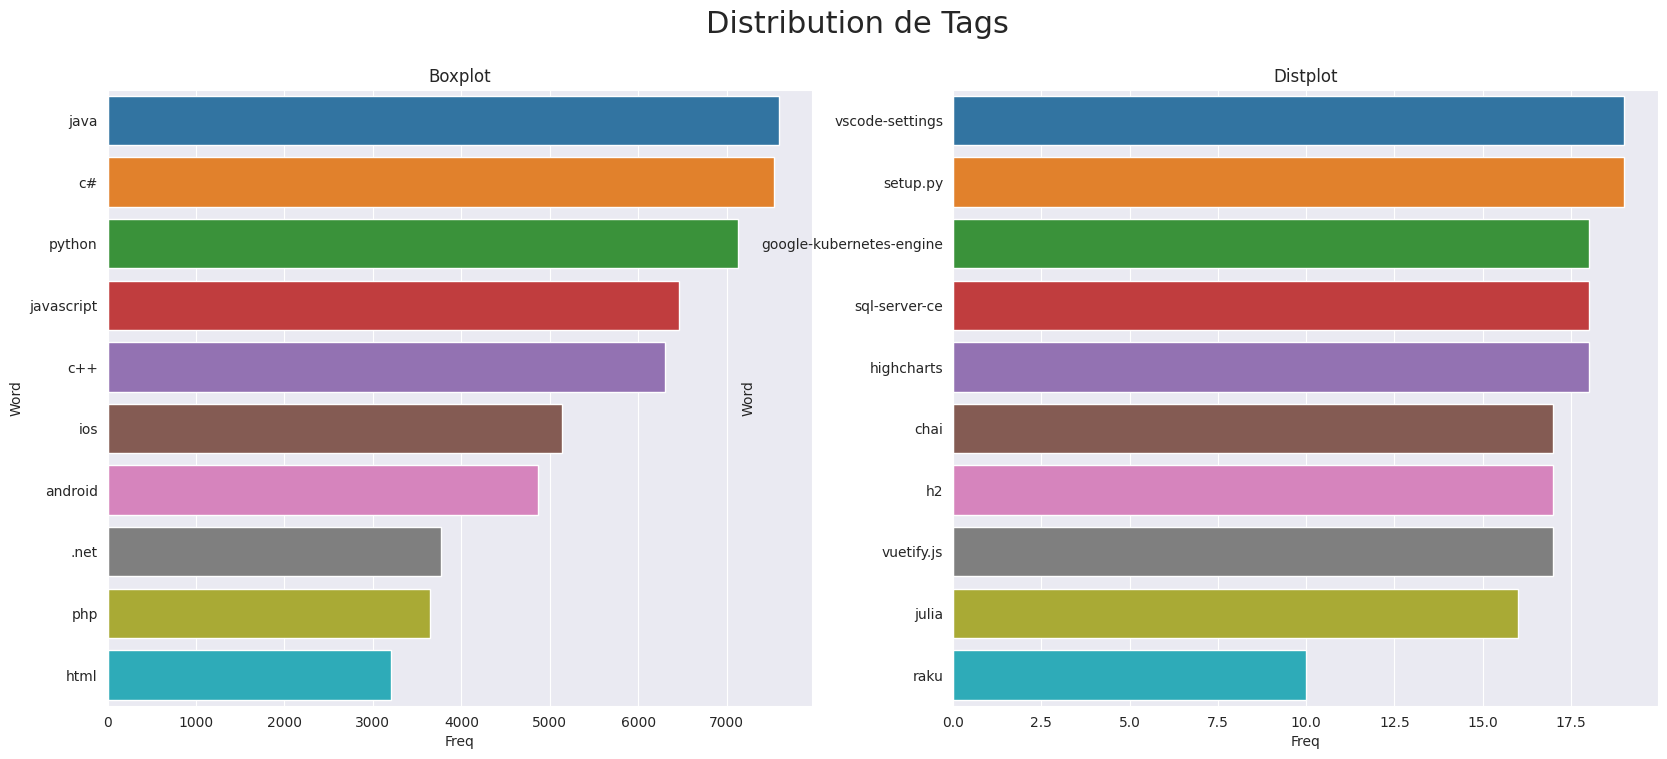

In [30]:
common_rare_words(df_merged_['Tags'])

In [31]:
# plt.figure(figsize=(20,5))
# plt.plot(df_merged["Tags"].apply(lambda text: len(str(text).split(" "))))
# plt.xlabel('movies')
# plt.ylabel("no.of tags per movie")
# plt.show()

In [32]:
# sns.distplot(df_merged["Tags"].apply(lambda text: len(str(text).split(" "))))
# plt.ylabel('% of tags in movies')
# plt.xlabel('no.of tags')
# plt.show()

In [33]:
df_merged_["Tags"].apply(lambda text: len(str(text).split(" "))).value_counts()

4    22929
3    21800
2    17402
5    17018
1     8101
Name: Tags, dtype: int64

In [34]:
df_merged_.reset_index(inplace=True, drop=True)

In [35]:
df_merged[df_merged['Title'].str.len() > 200]

Empty DataFrame
Columns: [Title, Body, Id, Tags, Score, ViewCount, AnswerCount, FavoriteCount]
Index: []

In [36]:
df_merged[df_merged['Body'].str.len() > 6000]

Empty DataFrame
Columns: [Title, Body, Id, Tags, Score, ViewCount, AnswerCount, FavoriteCount]
Index: []

In [37]:
df_merged_.shape

(87250, 8)

In [38]:
new_df.to_parquet('stack_overflow_v4.parquet')